In [9]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import numpy as np
import os
from grating import *
from ext_signal import *
from scipy.stats import qmc

In [10]:
def acuity(ecc):
    k = 0.2049795945022049
    log_cpd0 = 3.6741080244555278
    cpd = np.exp(-k*ecc + log_cpd0)
    return 2/cpd/4
    # return 1/cpd/4

K_onC = 29.13289963
K_onS = 23.17378917
K_offC = 22.71914498
K_offS = 12.53276353
r_C = (acuity(0.095) + acuity(0))/2
r_S = r_C*3
cov = 0.53753
def zeroCross(k1, k2, r1, r2):
    return np.sqrt(np.log(k1/k2)/(r2*r2 - r1*r1))*r1*r2
SF = 1.0/(zeroCross(K_offC, K_onS*cov, r_C, r_S)*2 + zeroCross(K_onC, K_offS*cov, r_C, r_S)*2)
print(SF)

# color-drifting
inputLMS = True
# range_deg = 0.0344
range_deg=0.034479770809412 
print(acuity(range_deg))
buffer_deg = acuity(range_deg)*3  #*2
print(f'range_deg = {range_deg}, buffer_deg = {buffer_deg}')
SF = 36
TF = 8
time = np.array([1/TF])
neye = 1
center = np.pi/2 
wing = np.pi/2
sharpness = 1

18.53509145317477
0.012775991216413523
range_deg = 0.034479770809412, buffer_deg = 0.038327973649240565


32 degree per pixel
crest in sRGB: [ 1.5214511  -1.83242368  0.72781358]
valley in sRGB: [-18.30753009   1.0386155    0.67997673]
0.0045504840286657855 degree per pixel
ecc = 0.034479770809412, buffer_ecc = 0.038327973649240565
1
adjusted to 1 frames in total
sharpness=1.0
sRGB space is not enough to represent the color
(array([-18.30576438,  -1.83242126,   0.67997842]), array([1.52145094, 1.03859808, 0.72781357]))


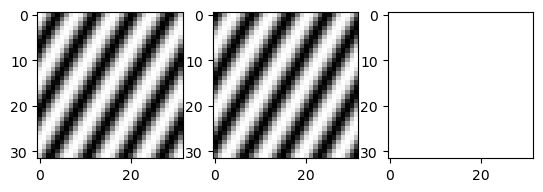

In [12]:
#生成grating  
'''
path：储存路径
C:contrast,范围在[0,0.5]
P:#相位,范围[0,2pi)
SF:spatial frequency,建议范围在10到40之间
D:方向,范围[0,pi]
frameRate:帧率（一秒几帧，=1就是静止的,>1就是动的)
size:图片大小
'''
def generate_input(path,C,P,SF,D,frameRate,size):
      n = 1 # 给图片编号的序号
      C = C.astype('float32')
      P = P.astype('float32')
      SF = SF.astype('float32')
      D = D.astype('float32')

      for c in C:
            for sf in SF:
                  for orient in D:
                        for phase in P:
                              crest = np.array([0.5+c, 0.5-c, 0.5]) #contrast和正弦光栅的波峰、波谷在LMS颜色空间的关系
                              valley = np.array([0.5-c, 0.5+c, 0.5])
                              video_fn = path + f'static_color-grid_test{n}'
                              cfg_fn = path + f'static_color-grid_test{n}_cfg' #XXXcfg.bin储存每张图的参数，可以关注一下这是怎么存的，要关注存的时候的变量类型，是f4还是u4，怎么存就怎么读，
                              f = open(cfg_fn+ '.bin', 'wb') # sf,d,p,c
                              np.array([sf]).astype('f4').tofile(f)
                              np.array([orient*180/np.pi]).astype('f4').tofile(f) #generate_grating需要弧度制，但是我参数保存的角度制
                              np.array([phase*180/np.pi]).astype('f4').tofile(f)
                              np.array([c]).astype('f4').tofile(f)
                              crest.astype('f4').tofile(f)
                              valley.astype('f4').tofile(f)
                              f.close()
                              generate_grating(1.0, sf, TF, orient, size, crest, valley, video_fn, time, phase, sharpness, frameRate, ecc = range_deg, buffer_ecc = buffer_deg, gtype='drifting', neye = neye, bar = False, center = center, wing = wing, mask = None, inputLMS = inputLMS,genMovie = True)
                              n = n+1              

def mk_path(path):#判断路径时候存在，不存在则创建
      if not os.path.exists(path):
            os.makedirs(path)
      
def main():
      # C = np.arange(0.05,0.55,0.05) # contrast
      C=np.array([0.45])
      #P = np.arange(0,1,1)#0 相位
      P=np.array([0.5*np.pi])
      SF = np.arange(30,40,10)#37
      D = np.array([np.pi/6])  # 方向范围[0,pi]
      frameRate=1
      size=32    #图片大小
      path = '/home/zhaobenyan/model/data_save/gratings/' #保存生成的grating的地址
      mk_path(path)
      generate_input(path,C,P,SF,D,frameRate,size)

main()